# ***List of the commands to debug the code ***

1.   h(elp) Show a list of commands, or find help on a specific command
2.   q(uit) Quit the debugger and the program

1.   c(ontinue) Quit the debugger, continue in the program

1.   n(ext) Go to the next step of the program

1.   Repeat the previous command

1.   p(rint) Print variables
2.   s(tep) Step into a subroutine

1.   r(eturn) Return out of a subroutine





#*****Code To Download The Dataset From Kaggel*****


In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'emg-signal-for-gesture-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F756231%2F1306261%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T165802Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7d7c215e91a64ad0cc324c012a796bfe22be0f2bacae07fd1cadde99528b6535531c300dd8c54a9034b14429e2ea24629619b5c8244a64191b41e019c4bb3e44fefa000b5cc0f63c09f5d78d6bad91614264aeb3fb3b1a5206c2d65727715f8a62cb0f86ae704834d61c4f3c0a156d9e37e3dccc986929e6931b48be2c54ca4b2a5105dc596585f1824c9e09a14a63765ac7fbfe643211682760a6a3fb82e450bde68ed5e057d1c28b36e9c50e4ea39f9ec303266007d9fbe34c8a695dd6e2954a93141e224dda5355bc4e67315cc99dba0114f65e081b16e0dfef1522372865f3f0092ca04300db28b7d0d1f0bd097fac72bf3e0a90d09c28210f9788fba404'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


PermissionError: [Errno 13] Permission denied: '/kaggle'

#***Necessary libraries***

In [ ]:
import pandas as pd
import random
import csv
import numpy as np
import pdb

#**Reading EMG Data from CSV**

In [ ]:
project_dataset_dir = '/kaggle/input/emg-signal-for-gesture-recognition/EMG-data.csv'
df = pd.read_csv(project_dataset_dir)        #the CSV file is loaded as 'df'

In [ ]:
df.info()  # Print information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     int64  
 10  label     int64  
dtypes: float64(8), int64(3)
memory usage: 355.7 MB


In [ ]:
df.drop('time', inplace=True, axis=1) # Drop the 'time' column
df.head()  # Print the rows of the DataFrame

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [ ]:
df.info()  # Assuming the CSV file is loaded as 'df' in previous code
len(df)  # Get information about the DataFrame and its length

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   channel1  float64
 1   channel2  float64
 2   channel3  float64
 3   channel4  float64
 4   channel5  float64
 5   channel6  float64
 6   channel7  float64
 7   channel8  float64
 8   class     int64  
 9   label     int64  
dtypes: float64(8), int64(2)
memory usage: 323.3 MB


4237907

In [ ]:
df.isna().sum() # Count missing values in each column

channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
label       0
dtype: int64

In [ ]:
print(df['class'].value_counts())  # Print the counts of unique values in the 'class' column
print(f"Total data Values: {len(df)}")

0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64
Total data Values: 4237907


In [ ]:
df.drop(df[df['class'] == 0].index, inplace=True)   # Remove Rows with Class 0 (In-Place)

In [ ]:
df.head()   # Display the first few rows of the DataFrame

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1


In [ ]:
all_labels_present = df.groupby('class')['label'].nunique() == 36    # use " unquniq() == 36 " to check if all class have 36 unique label
all_labels_present     # Unique labels per class (36 check)

class
1     True
2     True
3     True
4     True
5     True
6     True
7    False
Name: label, dtype: bool

#**Check How Label in Class 7**

In [ ]:
# check how many label in class = 7
class_7_data = df[df['class'] == 7]
class_7_label_counts = class_7_data.groupby('label').size().reset_index(name='count')
class_7_label_counts

,label,count
0,11,7105
1,30,6591


In [ ]:
data = df[df['class'] != 7]  # Exclude class-7 data

In [ ]:
data['class'].value_counts() # Remove rows with class-7, class - 0

6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: class, dtype: int64

In [ ]:
subjects_data = data.groupby(['label','class'])   # Categorize data by label and class

In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df
class_counts = data.groupby('class').size().reset_index(name='count')

print('Class distribution:')
print(class_counts)

Class distribution:
   class   count
0      1  250055
1      2  243193
2      3  249494
3      4  251570
4      5  251733
5      6  253009


In [ ]:
data     # print the data form 1 to 36 labels with 6 classes

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
...,...,...,...,...,...,...,...,...,...,...
4237207,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237208,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237209,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237210,0.00014,0.00003,-0.00001,0.00001,-0.00012,0.00006,-0.00007,-0.00013,6,36


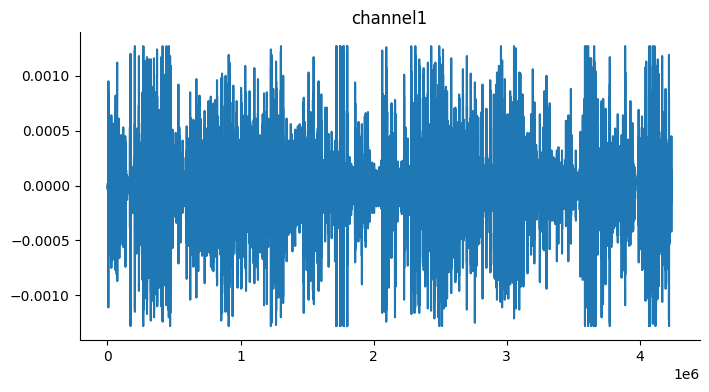

In [ ]:
from matplotlib import pyplot as plt
data['channel1'].plot(kind='line', figsize=(8, 4), title='channel1')
plt.gca().spines[['top', 'right']].set_visible(False)

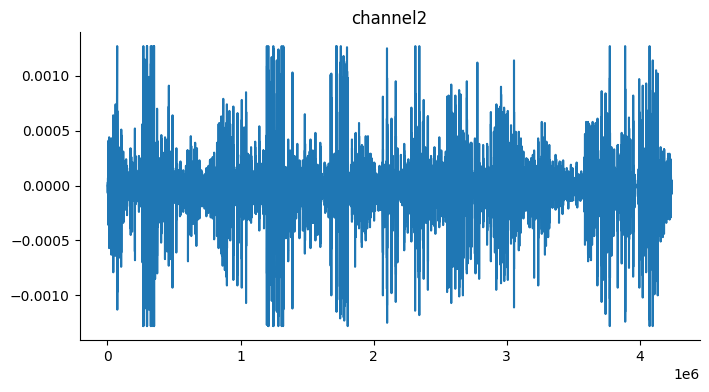

In [ ]:
from matplotlib import pyplot as plt
data['channel2'].plot(kind='line', figsize=(8, 4), title='channel2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.drop('label', inplace=True, axis=1)    #Delete 'label' column from DataFrame

<ipython-input-65-ef62ba00c612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('label', inplace=True, axis=1)    #Delete 'label' column from DataFrame


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499054 entries, 2287 to 4237211
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1499054 non-null  float64
 1   channel2  1499054 non-null  float64
 2   channel3  1499054 non-null  float64
 3   channel4  1499054 non-null  float64
 4   channel5  1499054 non-null  float64
 5   channel6  1499054 non-null  float64
 6   channel7  1499054 non-null  float64
 7   channel8  1499054 non-null  float64
 8   class     1499054 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 114.4 MB


# ***NORMALIZE PROCESS***

In [ ]:
pdb.set_trace()    # debuggere trace
def normalized(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value) / (max_value - min_value)    # formula to normalize the data
    return normalized_data

--Return--
None
> <ipython-input-67-8618d830c13d>(1)<cell line: 1>()
----> 1 pdb.set_trace()    # debuggere trace
      2 def normalized(data):
      3     min_value = np.min(data)
      4     max_value = np.max(data)
      5     normalized_data = (data - min_value) / (max_value - min_value)    # formula to normalize the data



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


channel1   -0.00128
channel2   -0.00128
channel3   -0.00128
channel4   -0.00128
channel5   -0.00128
channel6   -0.00128
channel7   -0.00128
channel8   -0.00128
class       1.00000
dtype: float64


# ***THE SLIDING WINDOW - CNN1***

In [ ]:
def sliding_window(data, window_size, stride):
    windowed_data = []  # Initialize an empty list to store windowed data
    labels = []  # Initialize an empty list to store corresponding labels

    # Iterate through the data with a sliding window of specified size and stride
    for i in range(0, len(data) - window_size + 1, stride):
        # Extract a window of data excluding the last column (label column) and convert it to a NumPy array
        windowed = data.iloc[i:i+window_size, :-1].values

        # Extract the label from the last column of the current window
        label = data.iloc[i+window_size-1, -1]

        # Append the windowed data and its corresponding label to their respective lists
        windowed_data.append(windowed)
        labels.append(label)

    # Convert the lists of windowed data and labels into NumPy arrays and return them
    return np.array(windowed_data), np.array(labels)


In [ ]:
pdb.set_trace()    # debuggere trace
window_size=150
stride=30
X, Y = sliding_window(data, 150, 30)

In [ ]:
cpdb.set_trace()    # debuggere trace
X = normalized(X)

In [ ]:
pdb.set_trace()    # debuggere trace
Y = Y - 1

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
pdb.set_trace()    # debuggere trace
# Split the data into training and testing sets, with 80% for training and 20% for testing
# X and Y are assumed to be the feature matrix and target vector, respectively
# random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary modules from TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model(input_shape, num_classes):
    model = Sequential()  # Create a Sequential model

    # Convolutional layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))  # Add a 1D convolutional layer with 32 filters
    model.add(MaxPooling1D(pool_size=2))  # Add a max pooling layer

    model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Add another 1D convolutional layer with 64 filters
    model.add(MaxPooling1D(pool_size=2))  # Add another max pooling layer

    # Flattening layer
    model.add(Flatten())  # Flatten the output of the convolutional layers

    # Fully connected layers
    model.add(Dense(128, activation='relu'))  # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))  # Add the output layer with softmax activation

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    model.summary()  # Print model summary
    return model  # Return the compiled model


In [ ]:
# Define the CNN model
pdb.set_trace()    # debuggere trace
input_shape = X_train.shape[1:]  # Set the input shape based on the features in the training data
num_classes = len(np.unique(Y))   # Determine the number of classes based on the unique values in the target vector

# Create the CNN model using the defined input shape and number of classes
model = CNN_model(input_shape, num_classes)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
pdb.set_trace()    # debuggere trace
# make predictions on training data
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # One-hot encoding'den etiketlere dönüştür

# make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere dönüştür

# calculate accuracy
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# calculate F1 score
f1_training = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Accuracy:", accuracy_training)
print("Test Accuracy:", accuracy_test)
print("Training F1 Score:", f1_training)
print("Test F1 Score:", f1_test)

In [ ]:
import matplotlib.pyplot as plt
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Plot training and testing loss graph
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Test Loss')  # Plot testing loss
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.title('Training and Testing Loss')  # Set the title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot


In [ ]:
# Import necessary modules
from sklearn.metrics import confusion_matrix  # Import confusion_matrix function from sklearn.metrics
import seaborn as sns  # Import seaborn library for visualization
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)  # Calculate confusion matrix using predicted and true labels

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix (Sliding Window)')  # Set the title of the plot
plt.xlabel('Predicted Labels')  # Set the label for the x-axis
plt.ylabel('Real Labels')  # Set the label for the y-axis
plt.show()  # Display the plot


In [ ]:
from sklearn.metrics import classification_report
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Calculate classification report
report = classification_report(y_test, y_pred_test, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report)




---








---



#***Fourier Transform - CNN2***




In [ ]:
import numpy as np
from scipy.fft import fft  # Import FFT (Fast Fourier Transform) function from scipy library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

pdb.set_trace()  # Set a breakpoint for debugging
def fourier_transform(X):
    transformed_data = []  # Initialize an empty list to store transformed data

    # Iterate through each item in the dataset
    for item in X:
        transformed_item = []  # Initialize an empty list to store transformed item

        # Transpose the data to work with each channel separately
        for channel in item.T:
            # Apply FFT (Fast Fourier Transform) to each channel and calculate amplitude
            fft_values = fft(channel)

            # Append amplitude information to the transformed item list
            transformed_item.append(np.abs(fft_values))

        # Convert the transformed item list into a NumPy array and append it to the transformed data list
        transformed_data.append(np.array(transformed_item))

    # Convert the transformed data list into a NumPy array and return
    return np.array(transformed_data)


In [ ]:
# apply fourier transform
pdb.set_trace()  # Set a breakpoint for debugging
transformed_X = fourier_transform(X)

In [ ]:
# Transpose the transformed data to bring the channels dimension to the last axis

pdb.set_trace()  # Set a breakpoint for debugging
transposed_X = np.transpose(transformed_X, (0, 2, 1))


In [ ]:
# Split the transformed data into training and testing sets

pdb.set_trace()  # Set a breakpoint for debugging
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(transposed_X, Y, test_size=0.2, random_state=42)


In [ ]:
# Define CNN model
pdb.set_trace()  # Set a breakpoint for debugging
input_shape = X_train_ft.shape[1:]  # Determine input shape based on transformed data
num_classes = len(np.unique(Y))   # Determine the number of classes based on unique values in the target vector

# Create CNN model using the determined input shape and number of classes
model_ft = CNN_model(input_shape, num_classes)


In [ ]:
# Train the CNN model on the transformed training data for 10 epochs, using the transformed validation data for evaluation
pdb.set_trace()  # Set a breakpoint for debugging
history_ft = model_ft.fit(X_train_ft, y_train_ft, epochs=10, validation_data=(X_test_ft, y_test_ft))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

pdb.set_trace()  # Set a breakpoint for debugging
# Make predictions on training data
y_pred_train_ft = model_ft.predict(X_train_ft)
y_pred_train_ft = np.argmax(y_pred_train_ft, axis=1)  # Convert predictions from one-hot encoding to class labels

# Make predictions on test data
y_pred_test_ft = model_ft.predict(X_test_ft)
y_pred_test_ft = np.argmax(y_pred_test_ft, axis=1)  # Convert predictions from one-hot encoding to class labels

# Calculate accuracy
accuracy_training_ft = accuracy_score(y_train_ft, y_pred_train_ft)  # Calculate accuracy on training data
accuracy_test_ft= accuracy_score(y_test_ft, y_pred_test_ft)  # Calculate accuracy on test data

# Calculate F1 score
f1_training_ft = f1_score(y_train_ft, y_pred_train_ft, average='weighted')  # Calculate F1 score on training data
f1_test_ft = f1_score(y_test_ft, y_pred_test_ft, average='weighted')  # Calculate F1 score on test data

# Print accuracy and F1 score
print("Training Accuracy FT:", accuracy_training_ft)  # Print training accuracy
print("Test Accuracy FT:", accuracy_test_ft)  # Print test accuracy
print("Training F1 Score FT:", f1_training_ft)  # Print training F1 score
print("Test F1 Score FT:", f1_test_ft)  # Print test F1 score


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pdb.set_trace()  # Set a breakpoint for debugging
# Generate confusion matrix
cm_ft = confusion_matrix(y_test, y_pred_test_ft)

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(cm_ft, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix FT')  # Set the title of the plot
plt.xlabel('Predicted Labels FT')  # Set the label for the x-axis
plt.ylabel('Real Labels FT')  # Set the label for the y-axis
plt.show()  # Display the plot


In [ ]:
from sklearn.metrics import classification_report
pdb.set_trace()  # Set a breakpoint for debugging
# Generate classification report including accuracy and F1 score for each class
report_ft = classification_report(y_test, y_pred_test_ft, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report_ft)


# ***Root Mean Square (RMS) - CNN3***

In [ ]:
# Set a breakpoint for debugging
pdb.set_trace()

# Print the shape of X
print(X.shape)


In [ ]:
import numpy as np
pdb.set_trace()  # Set a breakpoint for debugging

# Apply Root Mean Square (RMS) calculation across each sample in X
rms_data = np.sqrt(np.mean(np.square(X), axis=1))
c

In [ ]:
# Print the shape of rms_data
print(rms_data.shape)


In [ ]:
# making data three-dimensional
rms_data = np.expand_dims(rms_data, axis=-1)
print(rms_data)

In [ ]:
# Print the shape of rms_data
print(rms_data.shape)


In [ ]:
# Check the shape of the original data and the data after RMS processing
print("Original shape:", X.shape)
print("Shape After RMS Processing:", rms_data.shape)


In [ ]:
# Split the data into training and testing sets after RMS processing
pdb.set_trace()  # Set a breakpoint for debugging
X_train_rms, X_test_rms, y_train_rms, y_test_rms = train_test_split(rms_data, Y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential  # Import Sequential model from TensorFlow Keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense  # Import necessary layers from TensorFlow Keras
pdb.set_trace()  # Set a breakpoint for debugging

def CNN_model_rms(input_shape, num_classes):
    model = Sequential()  # Create a Sequential model

    # Convolutional Layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))  # Add a 1D convolutional layer with 32 filters and ReLU activation
    model.add(MaxPooling1D(pool_size=2))  # Add a max pooling layer

    model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Add another 1D convolutional layer with 64 filters and ReLU activation
    model.add(MaxPooling1D(pool_size=1))  # Add another max pooling layer

    # Flattening Layer
    model.add(Flatten())  # Flatten the output of the convolutional layers

    # Fully Connected Layers
    model.add(Dense(128, activation='relu'))  # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))  # Add the output layer with softmax activation

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric

    # Print model summary
    model.summary()  # Print model summary

    return model  # Return the compiled model


In [ ]:
# Print the shape of X_train_rms
print(X_train_rms.shape)


In [ ]:
# Define CNN model
input_shape_rms = X_train_rms.shape[1:]  # Determine input shape based on the processed data with RMS
num_classes_rms = len(np.unique(Y))   # Determine the number of classes based on unique values in the target vector

# Adjust input shape to match the expected format for Conv1D layer
input_shape_rms = (input_shape_rms[0], 1)  # Convert input shape to (input_shape[0], 1)

# Create CNN model using the adjusted input shape and number of classes
model_rms = CNN_model_rms(input_shape_rms, num_classes_rms)


In [ ]:
# Train the CNN model on the data processed with RMS for 10 epochs, using the RMS processed validation data for evaluation
history_rms = model_rms.fit(X_train_rms, y_train_rms, epochs=10, validation_data=(X_test_rms, y_test_rms))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score  # Import necessary metrics

# Predict on training data
y_pred_train_rms = model_rms.predict(X_train_rms)  # Make predictions on training data
y_pred_train_rms = np.argmax(y_pred_train_rms, axis=1)  # Convert predictions from one-hot encoding to class labels

# Predict on test data
y_pred_test_rms = model_rms.predict(X_test_rms)  # Make predictions on test data
y_pred_test_rms = np.argmax(y_pred_test_rms, axis=1)  # Convert predictions from one-hot encoding to class labels

# Calculate accuracy
accuracy_training_rms = accuracy_score(y_train_rms, y_pred_train_rms)  # Calculate accuracy on training data
accuracy_test_rms = accuracy_score(y_test_rms, y_pred_test_rms)  # Calculate accuracy on test data

# Calculate F1 score
f1_training_rms = f1_score(y_train_rms, y_pred_train_rms, average='weighted')  # Calculate F1 score on training data
f1_test_rms = f1_score(y_test_rms, y_pred_test_rms, average='weighted')  # Calculate F1 score on test data

# Print accuracy and F1 score
print("Training Accuracy RMS:", accuracy_training_rms)  # Print training accuracy
print("Test Accuracy RMS:", accuracy_test_rms)  # Print test accuracy
print("Training F1 Score RMS:", f1_training_rms)  # Print training F1 score
print("Test F1 Score RMS:", f1_test_rms)  # Print test F1 score


In [ ]:
from sklearn.metrics import classification_report  # Import classification_report function
pdb.set_trace()  # Set a breakpoint for debugging
# Generate classification report including accuracy and F1 score for each class
report_rms = classification_report(y_test, y_pred_test_rms, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report_rms)


In [ ]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix function
import seaborn as sns  # Import seaborn library for visualization
pdb.set_trace()  # Set a breakpoint for debugging
# Generate confusion matrix
cm_rms = confusion_matrix(y_test, y_pred_test_rms)

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(cm_rms, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix RMS')  # Set the title of the plot
plt.xlabel('Predicted Labels RMS')  # Set the label for the x-axis
plt.ylabel('Real Labels RMS')  # Set the label for the y-axis
plt.show()  # Display the plot


***New Method***
